In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans, MeanShift, DBSCAN, AgglomerativeClustering, Birch, estimate_bandwidth
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, pairwise_distances
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df=pd.read_csv("data/processed/processed_web_analytics.csv")
df["Date"]=pd.to_datetime(df["Date"])

### Exploratory Data Analysis (EDA)

In [3]:
# DataFrame Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Source                     249 non-null    object        
 1   Users                      249 non-null    int64         
 2   New_Users                  249 non-null    int64         
 3   Sessions                   249 non-null    int64         
 4   Bounce_Rate                249 non-null    float64       
 5   Pageviews                  249 non-null    int64         
 6   Conversion_Rate            249 non-null    float64       
 7   Transactions               249 non-null    int64         
 8   Revenue                    249 non-null    int64         
 9   Quantity_Sold              249 non-null    int64         
 10  Date                       249 non-null    datetime64[ns]
 11  Avg_Session_Duration_secs  249 non-null    float64       
dtypes: datet

In [4]:
# Showing first 5 rows
df.head()

,Source,Users,New_Users,Sessions,Bounce_Rate,Pageviews,Conversion_Rate,Transactions,Revenue,Quantity_Sold,Date,Avg_Session_Duration_secs
0,A,126870,104020,194667,0.7159,455159,0.20,394,83244,482,2019-11-01,71.0
1,A,120625,98574,194114,0.6456,559509,0.69,1347,203552,2402,2020-05-01,92.0
2,A,123361,104308,181175,0.4191,368907,0.26,477,94282,599,2019-10-01,65.0
3,A,106551,88428,170329,0.7592,368803,0.18,311,54971,415,2019-09-01,61.0
4,A,102123,82461,163446,0.6710,425410,0.70,1138,167113,1987,2020-06-01,80.0


In [5]:
# Summary Statistics
df.describe()

,Users,New_Users,Sessions,Bounce_Rate,Pageviews,Conversion_Rate,Transactions,Revenue,Quantity_Sold,Date,Avg_Session_Duration_secs
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249,249.000000
mean,11340.522088,8778.967871,16155.417671,0.492649,44287.710843,3.150602,85.393574,14832.104418,150.706827,2020-02-07 22:15:54.216867584,152.534137
min,41.000000,1.000000,127.000000,0.000000,237.000000,0.000000,0.000000,0.000000,0.000000,2019-09-01 00:00:00,2.000000
25%,318.000000,145.000000,399.000000,0.347700,1388.000000,0.140000,2.000000,224.000000,2.000000,2019-11-01 00:00:00,91.000000
50%,865.000000,493.000000,1146.000000,0.525400,4457.000000,0.420000,8.000000,1416.000000,14.000000,2020-02-01 00:00:00,133.000000
75%,7869.000000,3721.000000,10252.000000,0.618500,31980.000000,0.780000,84.000000,14964.000000,129.000000,2020-05-01 00:00:00,205.000000
max,126870.000000,104308.000000,194667.000000,0.986300,559509.000000,42.080000,1347.000000,203552.000000,2402.000000,2020-08-01 00:00:00,409.000000
std,24555.407501,20618.100558,35672.225385,0.202619,94040.501564,8.138685,178.167978,29800.642723,328.732252,NaN,78.123402


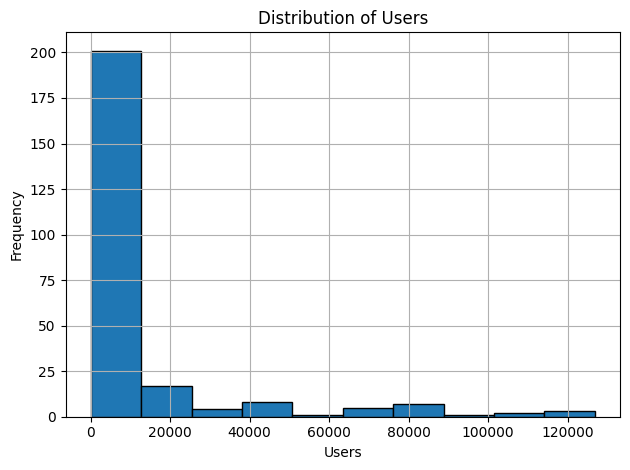

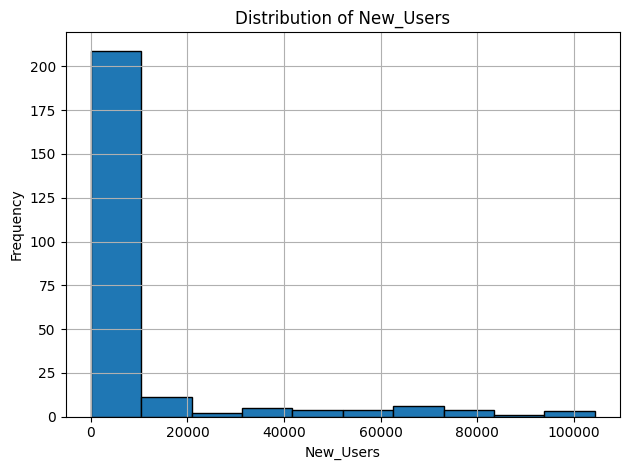

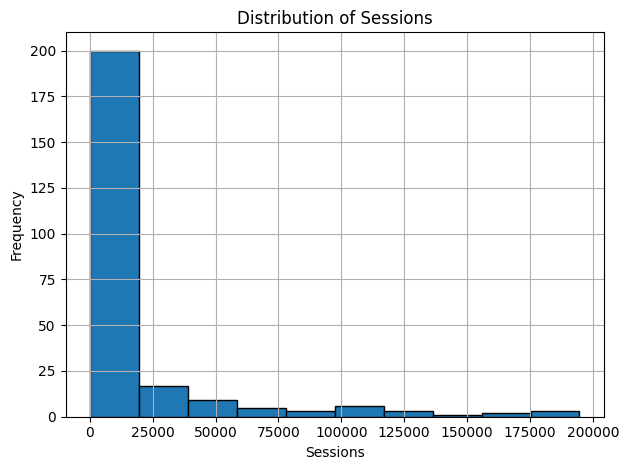

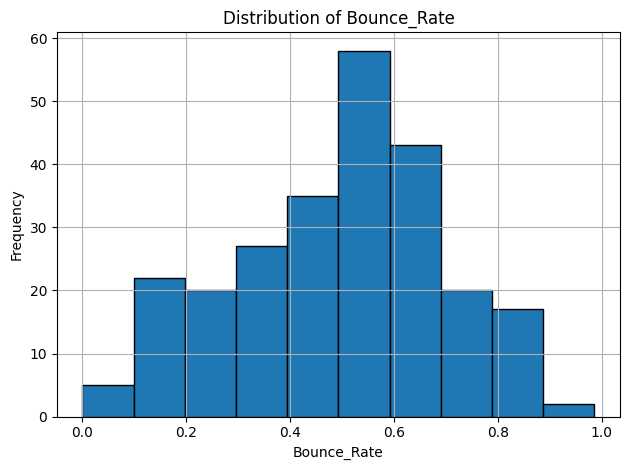

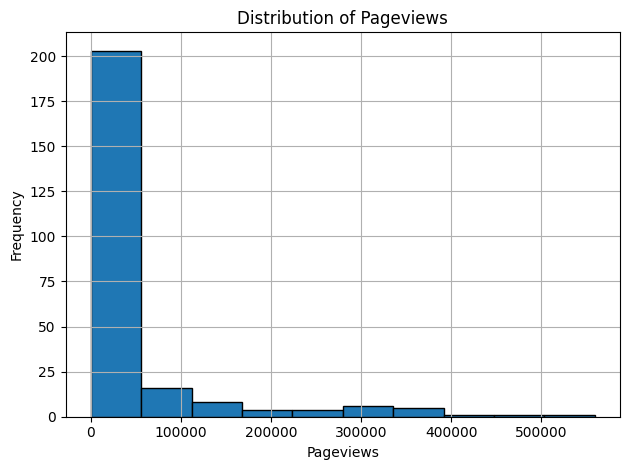

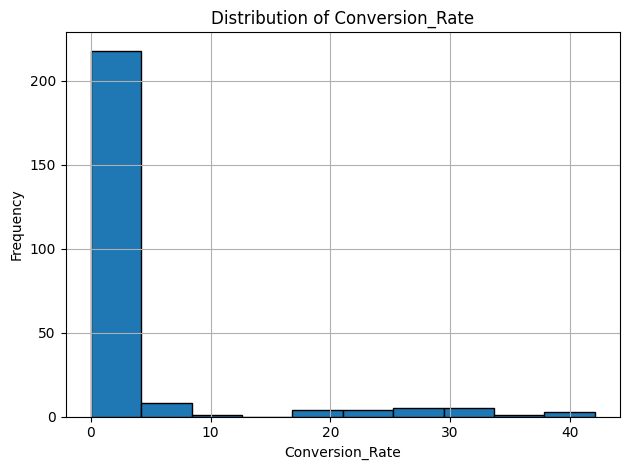

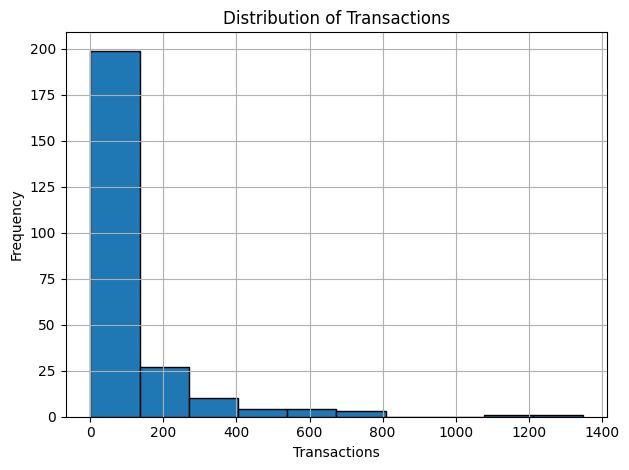

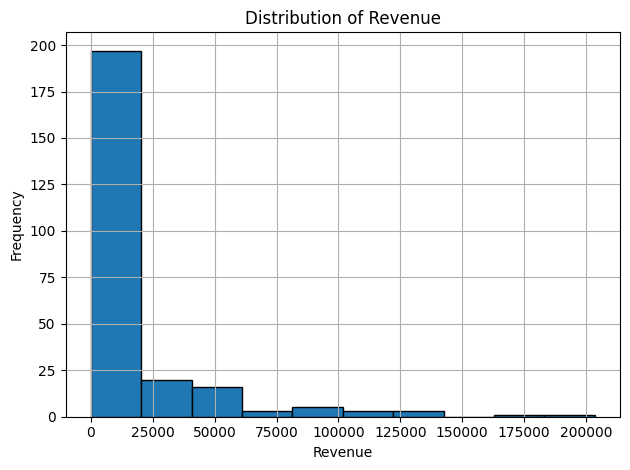

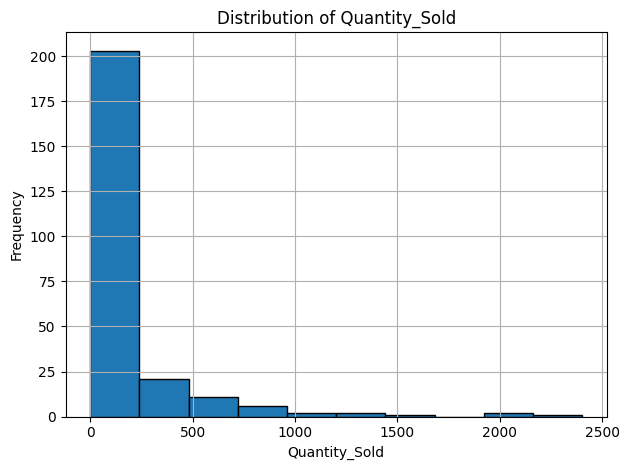

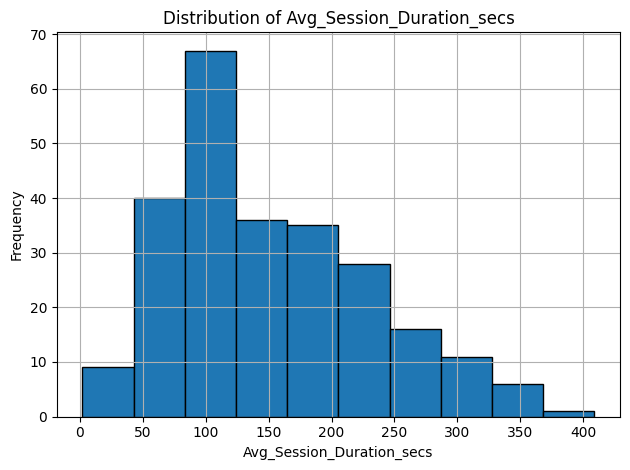

In [6]:
# Histogram of every numeric column
numeric_cols=df.select_dtypes(include=["int","float"]).columns
for col in numeric_cols:
    plt.figure()
    df[col].hist(histtype="bar",edgecolor="black")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

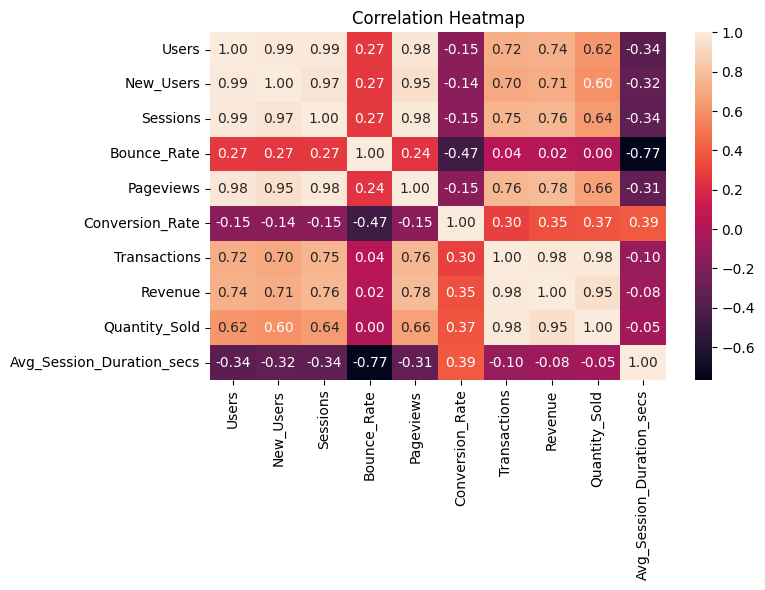

In [7]:
# Correlation Heatmap of numeric columns
plt.figure(figsize=(8,6))
corr=df[numeric_cols].corr()
sns.heatmap(corr,annot=True,fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

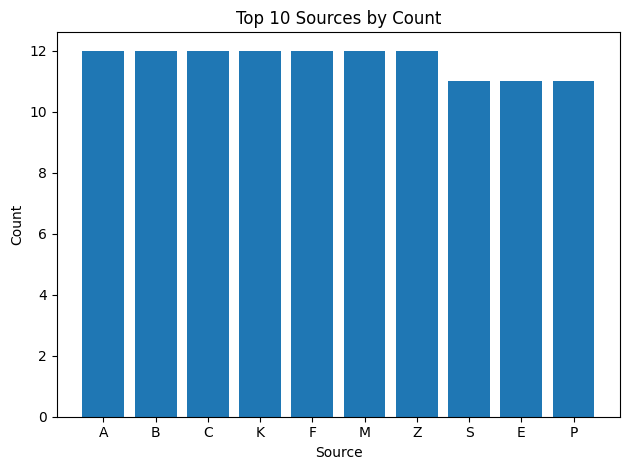

In [8]:
# Bar graph of Top 10 Sources by Count
plt.figure()
top_sources=df["Source"].value_counts().head(10)
plt.bar(top_sources.index,top_sources.values)
plt.title("Top 10 Sources by Count")
plt.xlabel("Source")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

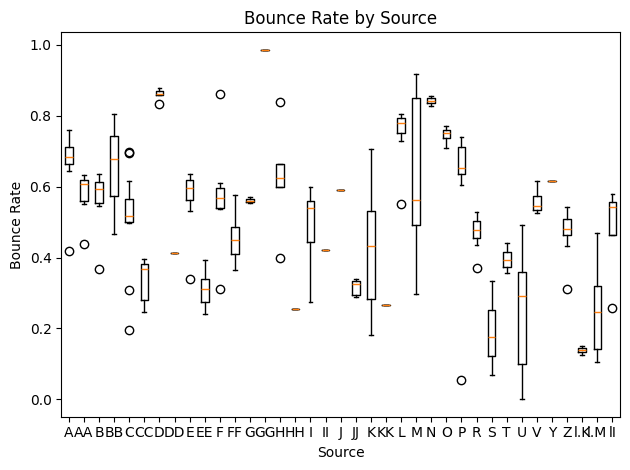

In [9]:
# Boxplot of Bounce_Rate by Source
plt.figure()
groups=df.groupby("Source")["Bounce_Rate"].apply(list)
plt.boxplot(groups.tolist(),tick_labels=groups.index)
plt.xlabel("Source")
plt.ylabel("Bounce Rate")
plt.title("Bounce Rate by Source")
plt.tight_layout()
plt.show()

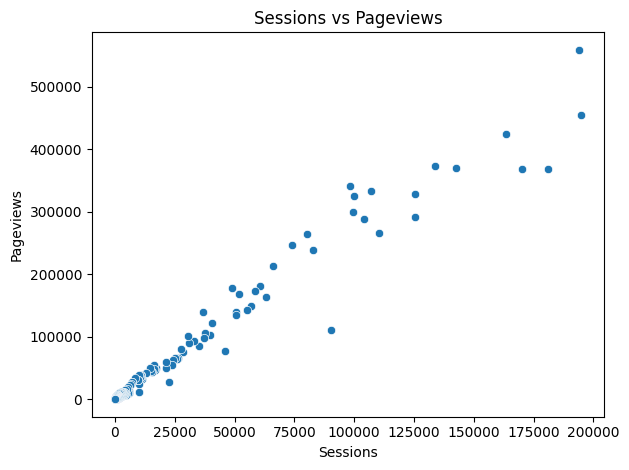

In [10]:
# Scatterplot of Sessions vs Pageviews
plt.figure()
sns.scatterplot(data=df,x="Sessions",y="Pageviews")
plt.title("Sessions vs Pageviews")
plt.tight_layout()
plt.show()

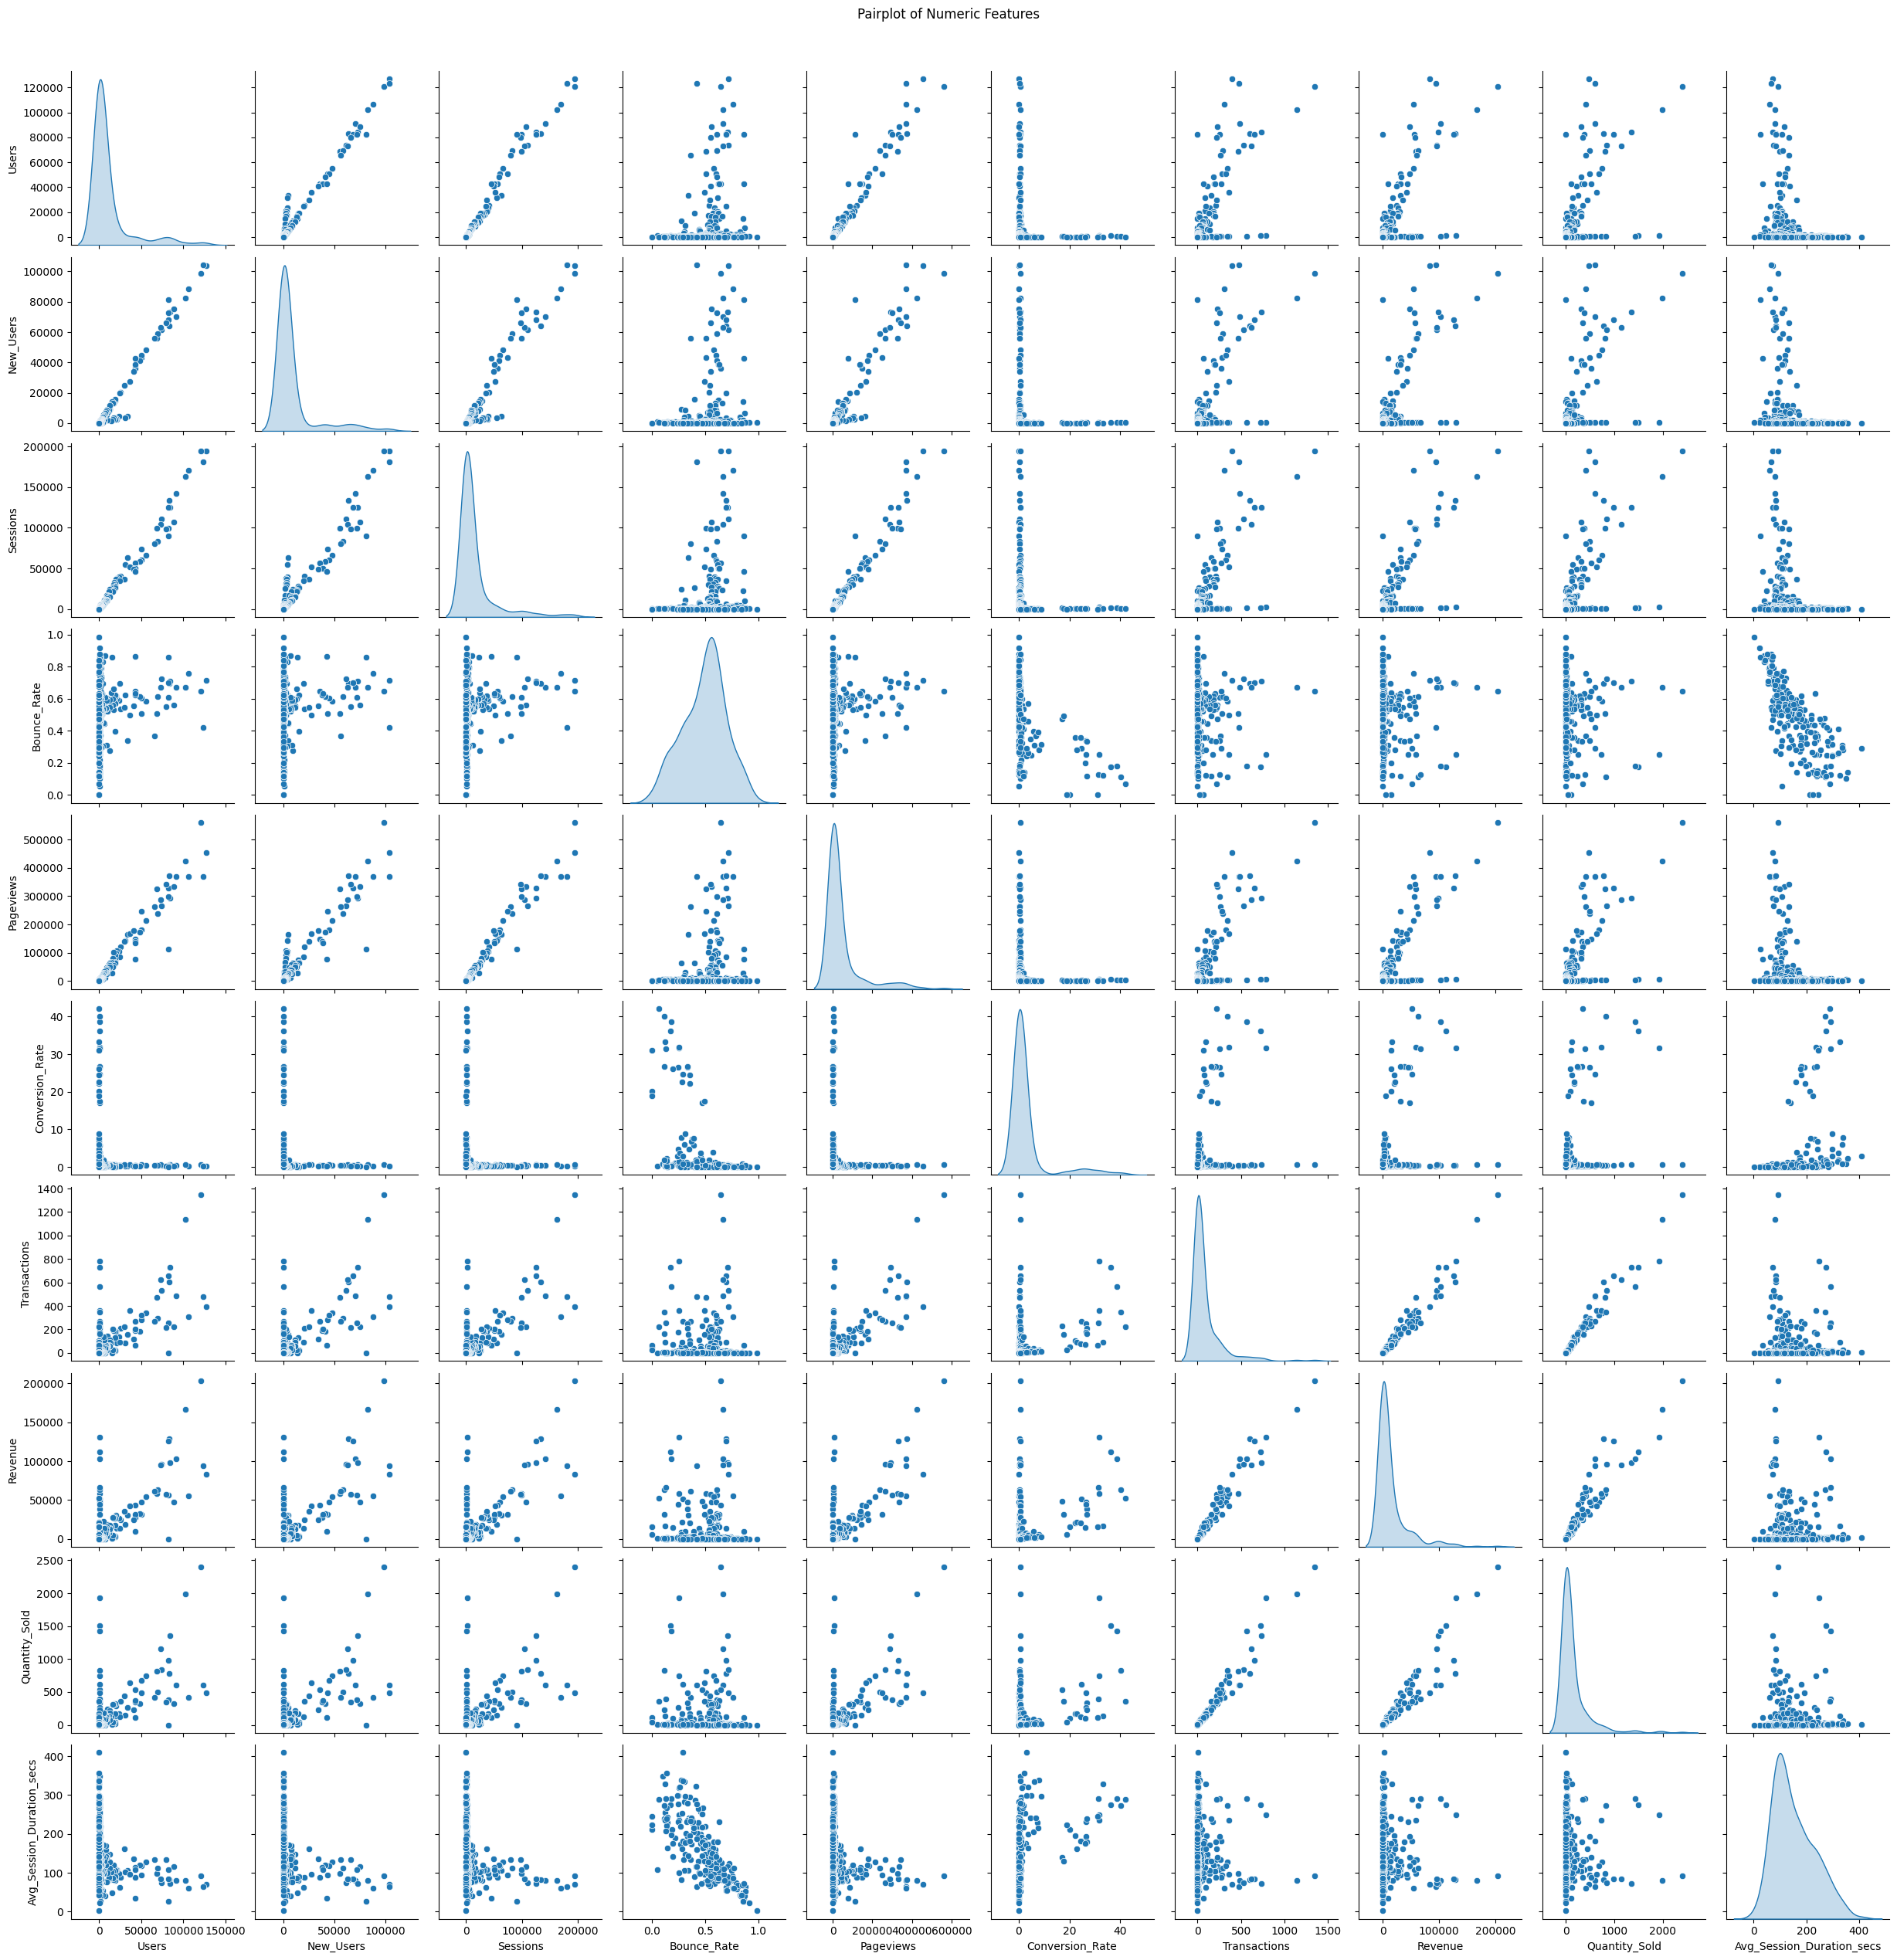

In [11]:
# Pairplot of numeric variables
numeric_cols=df.select_dtypes(include=["int","float"])
sns.pairplot(numeric_cols,diag_kind="kde")
plt.suptitle("Pairplot of Numeric Features",y=1.02)
plt.show()

In [12]:
# Encoding categorical features
le=LabelEncoder()
for col in df.select_dtypes(include=["object"]).columns:
    df[col]=le.fit_transform(df[col])

In [13]:
# Building RFM table and computing RFM score
max_date=df["Date"].max()
df["Recency"]=(max_date-df["Date"]).dt.days
df["Frequency"]=df["Sessions"]
df["Monetary"]=df["Revenue"]
rfm=df[["Recency","Frequency","Monetary"]].copy()
rfm["RFM_Score"]=rfm.sum(axis=1)
print("Sample RFM scores:")
print(rfm.head(),"\n")

Sample RFM scores:
   Recency  Frequency  Monetary  RFM_Score
0      274     194667     83244     278185
1       92     194114    203552     397758
2      305     181175     94282     275762
3      335     170329     54971     225635
4       61     163446    167113     330620 



In [14]:
# Feature scaling
scaler_std=StandardScaler()
X_std=scaler_std.fit_transform(rfm)

In [15]:
# Dimensionality Reduction
# PCA (retain 3 components)
pca=PCA(n_components=3,random_state=42)
X_pca=pca.fit_transform(X_std)
print("Explained variance ratio per PC:",pca.explained_variance_ratio_,"\n")

Explained variance ratio per PC: [0.69041382 0.2512259  0.05836029] 



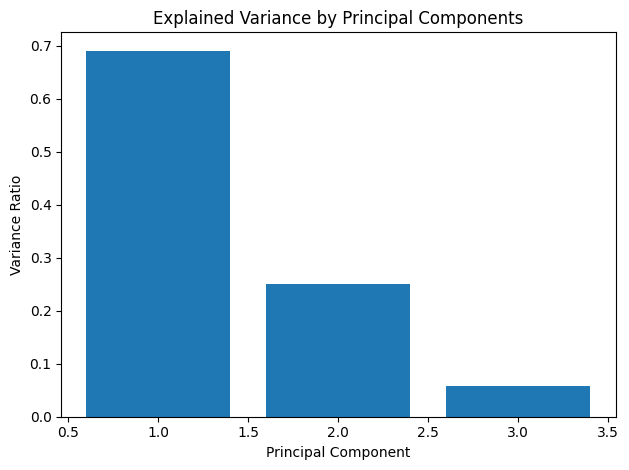

In [16]:
# Ploting explained variance
plt.figure()
plt.bar(range(1,4),pca.explained_variance_ratio_)
plt.xlabel("Principal Component")
plt.ylabel("Variance Ratio")
plt.title("Explained Variance by Principal Components")
plt.tight_layout()
plt.show()

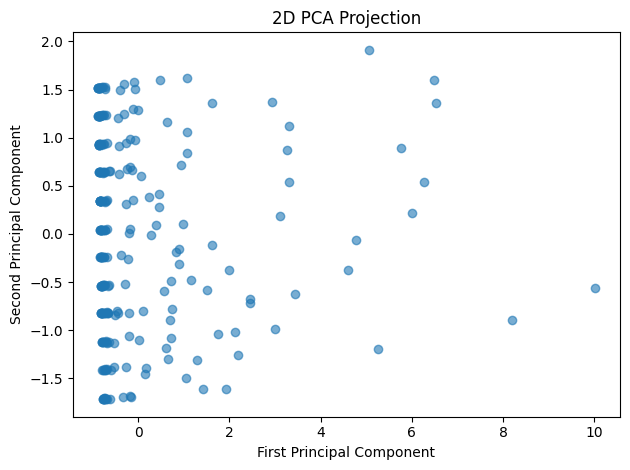

In [17]:
# 2D PCA projection
plt.figure()
plt.scatter(X_pca[:,0],X_pca[:,1],alpha=0.6)
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title("2D PCA Projection")
plt.tight_layout()
plt.show()

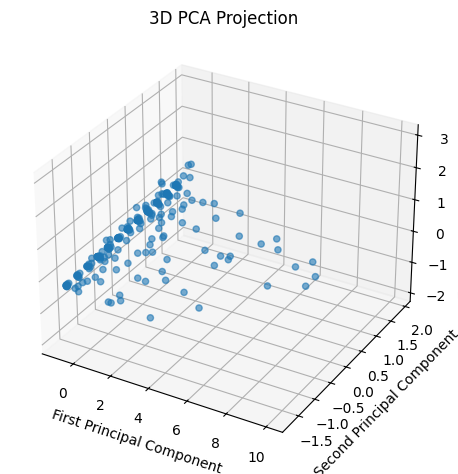

In [18]:
# 3D PCA projection
fig=plt.figure()
ax=fig.add_subplot(111,projection="3d")
ax.scatter(X_pca[:,0],X_pca[:,1],X_pca[:,2],alpha=0.6)
ax.set_xlabel("First Principal Component")
ax.set_ylabel("Second Principal Component")
ax.set_zlabel("Third Principal Component")
ax.set_title("3D PCA Projection")
plt.tight_layout()
plt.show()

Executing t-SNE:


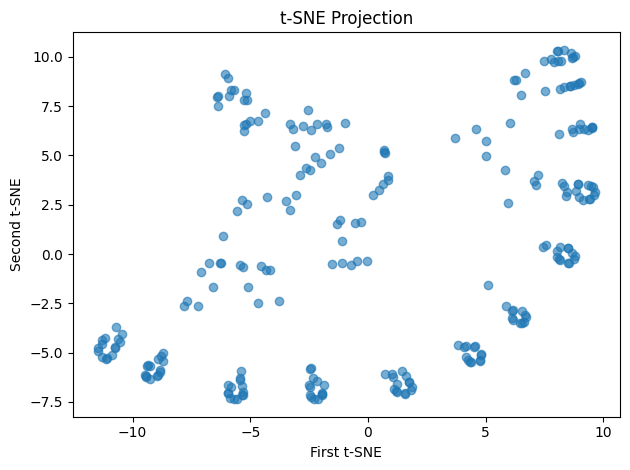

In [19]:
# t-SNE (sample if large)
if X_std.shape[0]>1000:
    idx=np.random.choice(X_std.shape[0],1000,replace=False)
    X_tsne_input=X_std[idx]
else:
    X_tsne_input=X_std
print("Executing t-SNE:")
X_tsne=TSNE(n_components=2,random_state=42,perplexity=30).fit_transform(X_tsne_input)
plt.figure()
plt.scatter(X_tsne[:,0],X_tsne[:,1],alpha=0.6)
plt.xlabel("First t-SNE")
plt.ylabel("Second t-SNE")
plt.title("t-SNE Projection")
plt.tight_layout()
plt.show()

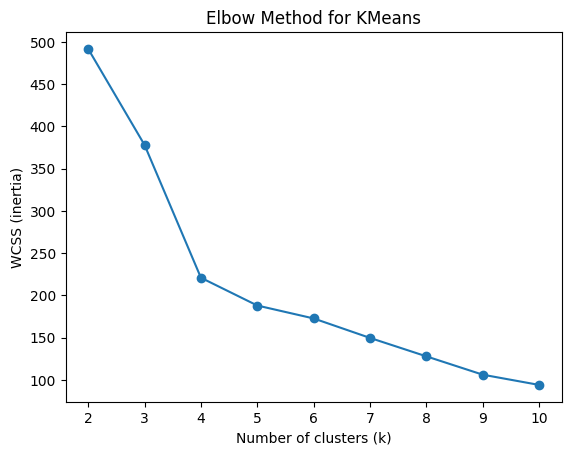

In [20]:
# Clustering Pipeline
# Elbow method for KMeans
wcss=[]
for k in range(2,11):
    km=KMeans(n_clusters=k,random_state=42).fit(X_std)
    wcss.append(km.inertia_)
plt.figure()
plt.plot(range(2,11),wcss,marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS (inertia)")
plt.title("Elbow Method for KMeans")
plt.show()

In [21]:
# Estimating MeanShift bandwidth based on quantile
bw=estimate_bandwidth(X_std,quantile=0.2,random_state=42)

# Estimating DBSCAN eps via k-distance (k=5) and 90th percentile knee
nbrs=NearestNeighbors(n_neighbors=5).fit(X_std)
distances,_=nbrs.kneighbors(X_std)
sorted_dist=np.sort(distances[:,-1])
eps_est=np.percentile(sorted_dist,90)

# Estimating BIRCH threshold as 50th percentile of pairwise distances
pdists=pairwise_distances(X_std)
thresh=np.percentile(pdists,25)

In [22]:
# Defining clustering models
cluster_models={
    "KMeans": lambda: KMeans(n_clusters=4,random_state=42),
    "MeanShift": lambda: MeanShift(bandwidth=bw),
    "DBSCAN": lambda: DBSCAN(eps=eps_est,min_samples=5),
    "Hierarchical": lambda: AgglomerativeClustering(n_clusters=4,linkage="ward"),
    "GMM": lambda: GaussianMixture(n_components=4,covariance_type="full",random_state=42),
    "BIRCH": lambda: Birch(n_clusters=4,threshold=thresh)
}

Executing KMeans


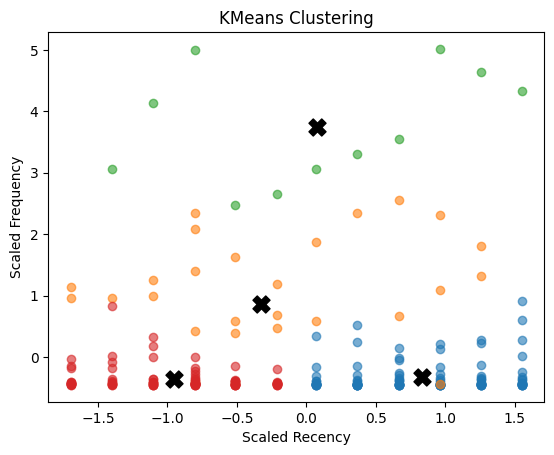

Cluster Summary for KMeans:
            Recency      Frequency       Monetary      RFM_Score
Cluster                                                         
0        261.365217    4682.600000    4804.417391    9748.382609
1        141.125000   47069.500000   48071.375000   95282.000000
2        182.909091  149594.272727  113688.636364  263465.818182
3         77.010989    3653.175824    3866.230769    7596.417582 

Executing MeanShift


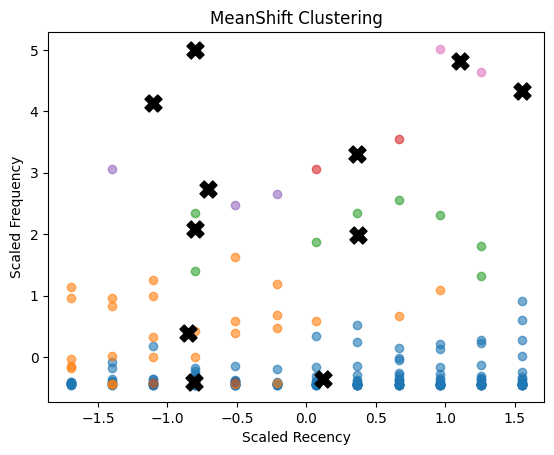

Cluster Summary for MeanShift:
            Recency      Frequency       Monetary      RFM_Score
Cluster                                                         
0        187.670051    3605.157360    3943.421320    7736.248731
1         87.448276   30120.448276   30689.413793   60897.310345
2        213.375000   87132.750000   53688.750000  141034.875000
3        213.000000  133897.000000  119230.000000  253340.000000
4        102.000000  113371.666667   96574.333333  210048.000000
5         91.666667    1981.333333  115420.666667  117493.666667
6        289.500000  187921.000000   88763.000000  276973.500000
7        335.000000  170329.000000   54971.000000  225635.000000
8         92.000000  194114.000000  203552.000000  397758.000000
9         92.000000   90447.000000       0.000000   90539.000000
10        61.000000  163446.000000  167113.000000  330620.000000 

Executing DBSCAN


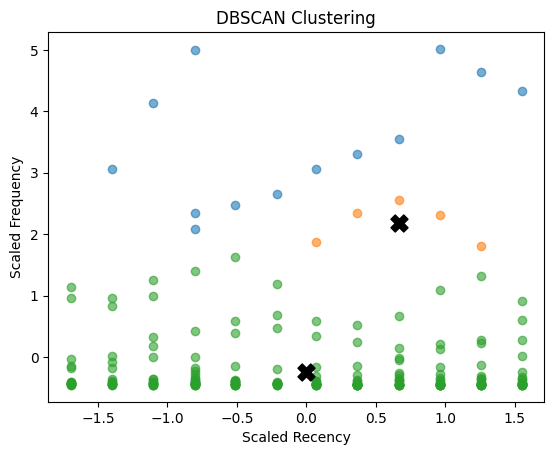

Cluster Summary for DBSCAN:
            Recency      Frequency       Monetary      RFM_Score
Cluster                                                         
-1       154.437500  115110.375000  103473.812500  218738.625000
 0       243.600000   93614.400000   57059.600000  150917.600000
 1       175.017544    7512.548246    7685.592105   15373.157895 

Executing Hierarchical


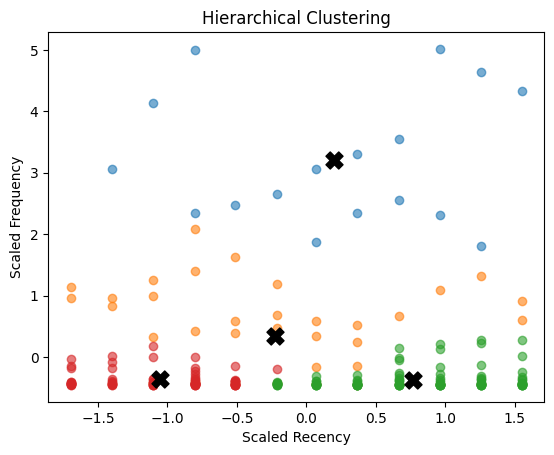

Cluster Summary for Hierarchical:
            Recency      Frequency      Monetary      RFM_Score
Cluster                                                        
0        195.411765  130202.764706  93801.000000  224199.176471
1        151.720930   28231.441860  37797.302326   66180.465116
2        254.230088    3067.867257   2100.681416    5422.778761
3         66.039474    3271.460526   3104.157895    6441.657895 

Executing GMM


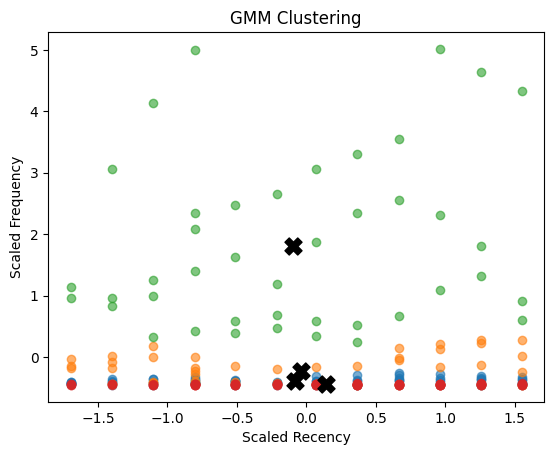

Cluster Summary for GMM:
            Recency     Frequency      Monetary      RFM_Score
Cluster                                                       
0        166.864865   2180.175676   1553.121622    3900.162162
1        171.230769   8434.326923  24671.096154   33276.653846
2        165.500000  80714.142857  54239.071429  135118.714286
3        190.000000    404.777778    213.888889     808.666667 

Executing BIRCH


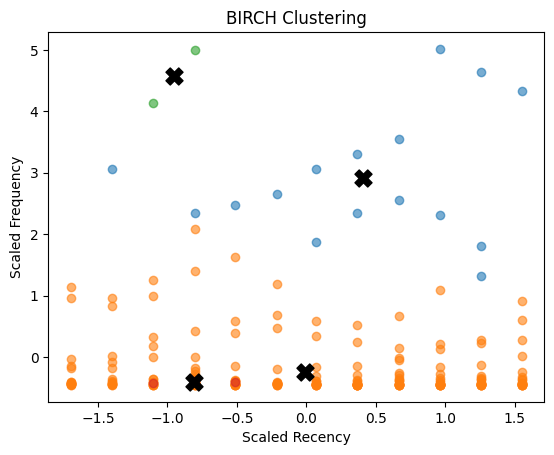

Cluster Summary for BIRCH:
            Recency      Frequency       Monetary      RFM_Score
Cluster                                                         
0        217.125000  119928.687500   78424.625000  198570.437500
1        174.083333    7633.052632    7550.320175   15357.456140
2         76.500000  178780.000000  185332.500000  364189.000000
3         91.666667    1981.333333  115420.666667  117493.666667 



In [23]:
# Fitting, ploting, and evaluating each clustering model
evaluation=[]
for name, ctor in cluster_models.items():
    print(f"Executing {name}")
    model=ctor() if callable(ctor) else ctor
    labels=model.fit_predict(X_std)

    # Computing centroids per cluster
    unique_labels=np.unique(labels)
    centroids=np.array([X_std[labels==lbl].mean(axis=0) for lbl in unique_labels if lbl!=-1])

    # 2D scatter on first two scaled RFM features
    plt.figure()
    for lbl in unique_labels:
        mask=(labels==lbl)
        plt.scatter(X_std[mask,0],X_std[mask,1],label=f"Cluster {lbl}",alpha=0.6)
    plt.scatter(centroids[:,0],centroids[:,1],marker="X",s=150,c="black",label="Centroids")
    plt.xlabel("Scaled Recency")
    plt.ylabel("Scaled Frequency")
    plt.title(f"{name} Clustering")
    plt.show()

    # Evaluation metrics
    sil=silhouette_score(X_std[labels!=-1],labels[labels!=-1]) if len(unique_labels) > 1 else np.nan
    db=davies_bouldin_score(X_std[labels!=-1],labels[labels!=-1]) if len(unique_labels) > 1 else np.nan
    ch=calinski_harabasz_score(X_std[labels!=-1],labels[labels!=-1]) if len(unique_labels) > 1 else np.nan
    inertia=getattr(model,"inertia_",np.nan)
    evaluation.append({"Algorithm":name,"Silhouette":sil,"Davies-Bouldin":db,"Calinski-Harabasz":ch,"WCSS":inertia})

    # Cluster summary (using RFM)
    rfm_with_labels=rfm.copy()
    rfm_with_labels["Cluster"]=labels
    summary=rfm_with_labels.groupby("Cluster").mean()
    print(f"Cluster Summary for {name}:")
    print(summary,"\n")

In [24]:
results_df=pd.DataFrame(evaluation)
print("Clustering Evaluation Metrics:")
print(results_df,"\n")

Clustering Evaluation Metrics:
      Algorithm  Silhouette  Davies-Bouldin  Calinski-Harabasz        WCSS
0        KMeans    0.488423        0.806123         286.599016  220.873146
1     MeanShift    0.375090        0.582013          62.805311         NaN
2        DBSCAN    0.590877        0.439887          44.130102         NaN
3  Hierarchical    0.464297        0.922584         251.031598         NaN
4           GMM   -0.012057        4.515282          64.459996         NaN
5         BIRCH    0.602907        0.561643         115.675331         NaN 



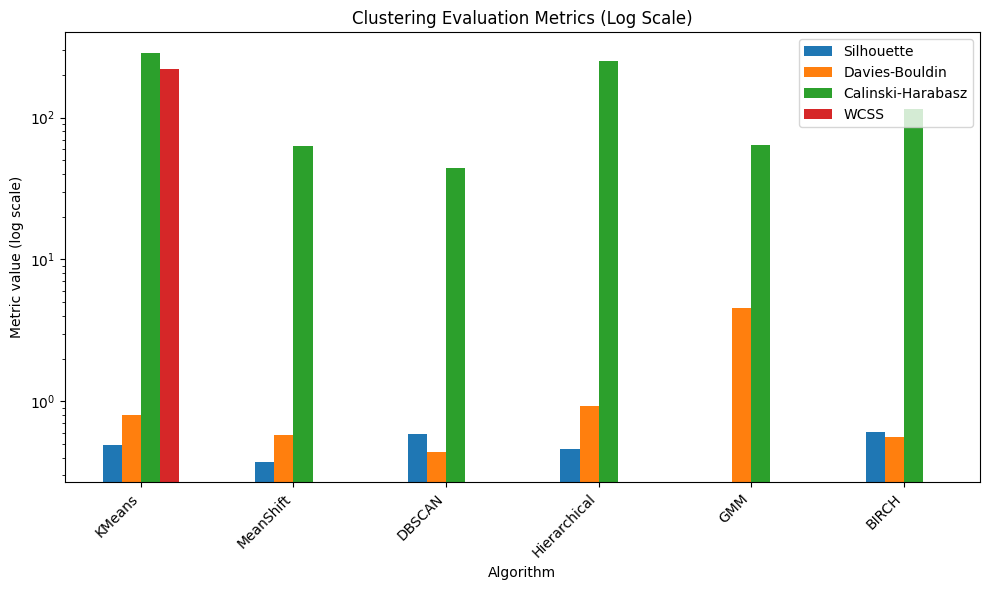

In [25]:
# Plot evaluation metrics
plot_df=results_df.set_index("Algorithm")
plot_df.plot(kind="bar",logy=True,figsize=(10,6))
plt.title("Clustering Evaluation Metrics (Log Scale)")
plt.ylabel("Metric value (log scale)")
plt.xlabel("Algorithm")
plt.xticks(rotation=45,ha="right")
plt.tight_layout()
plt.show()

In [26]:
# Selecting best algorithm
results_df["rank_sil"]=results_df["Silhouette"].rank(ascending=False)
results_df["rank_db"]=results_df["Davies-Bouldin"].rank(ascending=True)
results_df["rank_ch"]=results_df["Calinski-Harabasz"].rank(ascending=False)
results_df["rank_wcss"]=results_df["WCSS"].rank(ascending=True)
results_df["rank_sum"]=results_df[["rank_sil","rank_db","rank_ch","rank_wcss"]].sum(axis=1)
best_row=results_df.loc[results_df["rank_sum"].idxmin()]
best_algo=best_row["Algorithm"]
print(f"Best algorithm:{best_algo}\n")

Best algorithm:BIRCH



In [27]:
# Assigning final cluster labels
if best_algo=="GMM":
    df["Cluster"]=GaussianMixture(n_components=4,covariance_type="full",random_state=42).fit_predict(X_std)
elif best_algo=="KMeans":
    df["Cluster"]=KMeans(n_clusters=4,random_state=42).fit_predict(X_std)
elif best_algo=="MeanShift":
    df["Cluster"]=MeanShift(bandwidth=bw).fit_predict(X_std)
elif best_algo=="DBSCAN":
    df["Cluster"]=DBSCAN(eps=eps_est,min_samples=5).fit_predict(X_std)
elif best_algo=="Hierarchical":
    df["Cluster"]=AgglomerativeClustering(n_clusters=4,linkage="ward").fit_predict(X_std)
else:
    df["Cluster"]=Birch(n_clusters=4,threshold=thresh).fit_predict(X_std)

In [28]:
# Final profiling using the best algorithm labels
best_model=cluster_models[best_algo]()
best_labels=best_model.fit_predict(X_std)
rfm["Cluster"]=best_labels
final_profile=df.groupby("Cluster").mean()
print(f"Final Cluster Profile (by {best_algo} Algorithm):")
print(final_profile)

Final Cluster Profile (by BIRCH Algorithm):
            Source          Users     New_Users       Sessions  Bounce_Rate  \
Cluster                                                                       
0         1.375000   83353.750000  67863.687500  119928.687500     0.601175   
1        18.973684    5545.469298   4024.092105    7633.052632     0.487385   
2         0.000000  111374.000000  90517.500000  178780.000000     0.658300   
3        28.000000    1005.000000    538.666667    1981.333333     0.203433   

             Pageviews  Conversion_Rate  Transactions        Revenue  \
Cluster                                                                
0        317505.625000         0.355625    418.375000   78424.625000   
1         21683.951754         2.942456     43.890351    7550.320175   
2        492459.500000         0.695000   1242.500000  185332.500000   
3          6230.000000        35.513333    692.333333  115420.666667   

         Quantity_Sold                Date  Avg_